In [45]:
# import libraries
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from googleapiclient.discovery import build
from dotenv import load_dotenv
from googleapiclient.discovery import build

In [46]:
# Load environment variables from the .env file
load_dotenv()

# Retrieve the API key from the environment variable
API_KEY = os.getenv('API_KEY')
youtube = build("youtube", "v3", developerKey = API_KEY)

In [47]:
# Retrieve YT channels

def search_channels(youtube, query, max_results =1000):
    request = youtube.search().list(
        part='snippet',
        type='channel',
        q=query,
        regionCode='KE',
        maxResults=max_results
    )
    response = request.execute()
    
    channels = []
    for item in response['items']:
        data = {
            'channel_id': item['snippet']['channelId'],
            'channel_title': item['snippet']['title'],
            'description': item['snippet']['description']
        }
        channels.append(data)
    
    return pd.DataFrame(channels)


query = ('Kenya')
df_channels = search_channels(youtube, query)
df_channels.head()


,channel_id,channel_title,description
0,UCXuseB7juWB7DIgTJcwtHFQ,Parliament of Kenya,This is the official Parliament of Kenya YouTu...
1,UCBXe79nnuPRYci4acLafjHA,Auto Konnekt Kenya,We are all about cars. An alluring motor vehic...
2,UCuNsouEfEq9Sh6tapfg4uRA,State House Kenya,Official State House Youtube Channel.
3,UCLEbibgwOY787d16dXshmbg,Judicial Service Commission of Kenya,The Judicial Service Commission (JSC) of Kenya...
4,UCn0gL0gaCE9Moxe0UFIruzw,Betty's Stories From Kenya(Истории Бетти из Ке...,"Привет ! Меня зовут Беатрис ,я кенийка .Этот б..."


In [48]:
# Get the channel statistics

def get_channel_stats(youtube, channel_ids):
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(channel_ids)
    )
    response = request.execute()
    
    channels = []
    for item in response['items']:
        data = {
            'channel_id': item['id'],
            'channel_title': item['snippet']['title'],
            'subscribers': int(item['statistics'].get('subscriberCount', 0)),
            'views': int(item['statistics'].get('viewCount', 0)),
            'total_videos': int(item['statistics'].get('videoCount', 0)),
            'playlist_id': item['contentDetails']['relatedPlaylists']['uploads']
        }
        channels.append(data)
    
    return pd.DataFrame(channels)

# Get channel statistics for the channels retrieved from the search
channel_ids = df_channels['channel_id'].tolist()
df_channel_stats = get_channel_stats(youtube, channel_ids)
df_channel_stats.head()


,channel_id,channel_title,subscribers,views,total_videos,playlist_id
0,UCB2Hrtd2yFOV3MnQJGDDyJw,KENYA NEWSLINE,55800,16199054,5551,UUB2Hrtd2yFOV3MnQJGDDyJw
1,UC4NkdaGApEQGOjSzxm2p_WQ,Prince Jack Kenya,12300,762071,824,UU4NkdaGApEQGOjSzxm2p_WQ
2,UCv_-B3iPYj2XQ2gQ_fyhHRw,Central Bank of Kenya,5860,463907,172,UUv_-B3iPYj2XQ2gQ_fyhHRw
3,UCqsMqnE4xDOJswRT_cwcGXg,Dj Protege Kenya,23400,2825029,85,UUqsMqnE4xDOJswRT_cwcGXg
4,UCbSLlb6bgjIbmVd9PBRzpew,Linken kenya music,2330,61065,79,UUbSLlb6bgjIbmVd9PBRzpew


In [49]:
# Search for channels in Kenya with the keyword 'education'
query = 'Kenya'
df_channels = search_channels(youtube, query)

# Retrieve statistics for the channels found
channel_ids = df_channels['channel_id'].tolist()
df_channel_stats = get_channel_stats(youtube, channel_ids)

# Display the combined data
df_combined = pd.merge(df_channels, df_channel_stats, on='channel_id')
df_combined.head()



,channel_id,channel_title_x,description,channel_title_y,subscribers,views,total_videos,playlist_id
0,UCXuseB7juWB7DIgTJcwtHFQ,Parliament of Kenya,This is the official Parliament of Kenya YouTu...,Parliament of Kenya,68200,7175267,1790,UUXuseB7juWB7DIgTJcwtHFQ
1,UCBXe79nnuPRYci4acLafjHA,Auto Konnekt Kenya,We are all about cars. An alluring motor vehic...,Auto Konnekt Kenya,32900,1157630,40,UUBXe79nnuPRYci4acLafjHA
2,UCuNsouEfEq9Sh6tapfg4uRA,State House Kenya,Official State House Youtube Channel.,State House Kenya,72800,10669448,4332,UUuNsouEfEq9Sh6tapfg4uRA
3,UCLEbibgwOY787d16dXshmbg,Judicial Service Commission of Kenya,The Judicial Service Commission (JSC) of Kenya...,Judicial Service Commission of Kenya,2150,225777,138,UULEbibgwOY787d16dXshmbg
4,UCn0gL0gaCE9Moxe0UFIruzw,Betty's Stories From Kenya(Истории Бетти из Ке...,"Привет ! Меня зовут Беатрис ,я кенийка .Этот б...",Betty's Stories From Kenya(Истории Бетти из Ке...,27100,5006361,356,UUn0gL0gaCE9Moxe0UFIruzw


In [50]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   channel_id       50 non-null     object
 1   channel_title_x  50 non-null     object
 2   description      50 non-null     object
 3   channel_title_y  50 non-null     object
 4   subscribers      50 non-null     int64 
 5   views            50 non-null     int64 
 6   total_videos     50 non-null     int64 
 7   playlist_id      50 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.3+ KB


In [51]:
df_combined.isnull().sum()

channel_id         0
channel_title_x    0
description        0
channel_title_y    0
subscribers        0
views              0
total_videos       0
playlist_id        0
dtype: int64

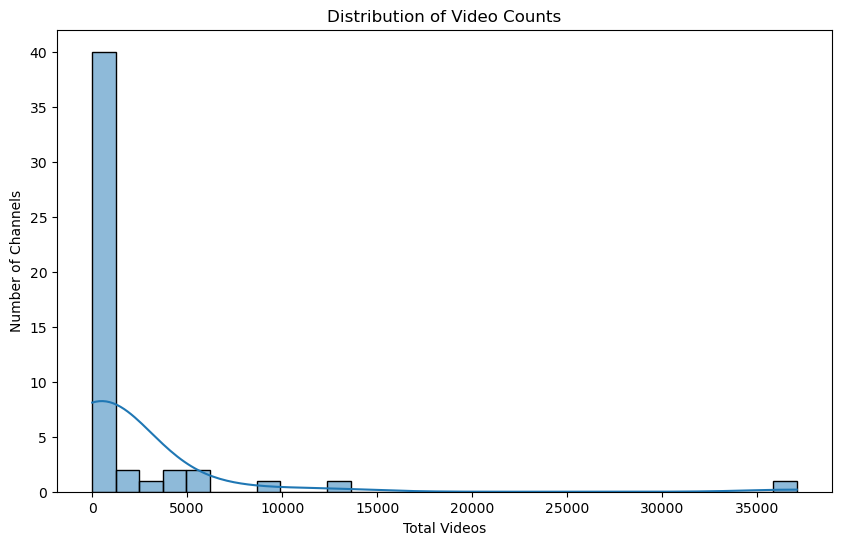

In [52]:
# Analyze video count distribution
plt.figure(figsize= (10,6))
sns.histplot(df_channel_stats['total_videos'], bins = 30, kde = True)
plt.title("Distribution of Video Counts")
plt.xlabel('Total Videos')
plt.ylabel('Number of Channels')
plt.show()

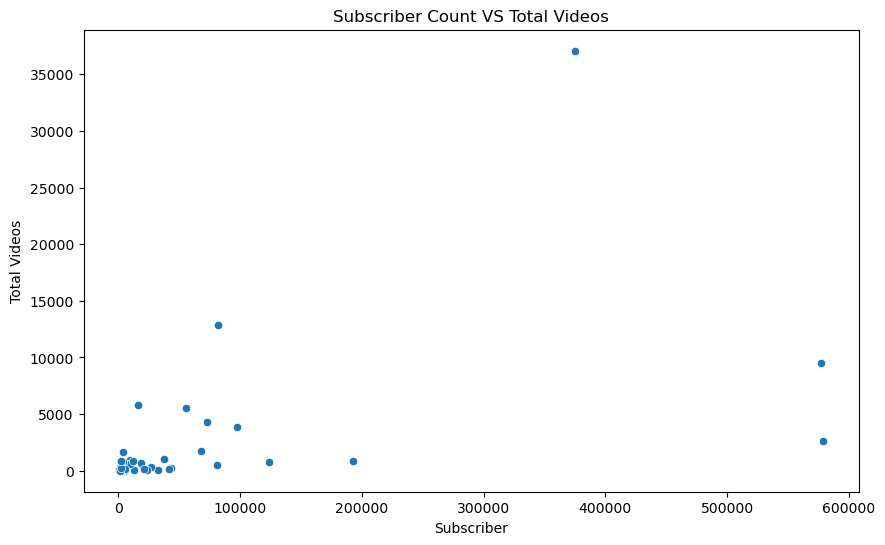

In [53]:
# Analyzing subscriber trends

plt.figure(figsize= (10,6))
sns.scatterplot(x= 'subscribers', y= 'total_videos', data= df_combined)
plt.title('Subscriber Count VS Total Videos')
plt.xlabel('Subscriber')
plt.ylabel('Total Videos')
plt.show()


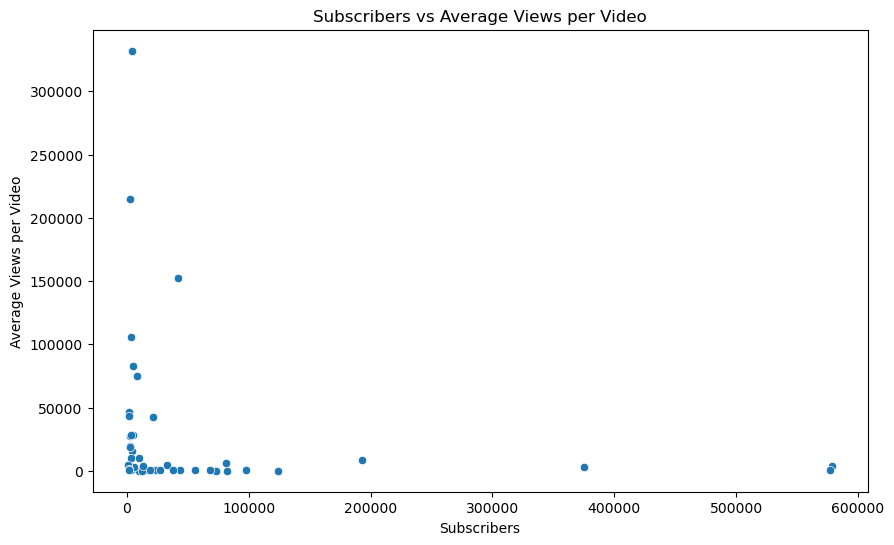

In [54]:
# Analysing engagement metrics

df_channel_stats['Avg_Views_Per_Video'] = df_combined['views'] / df_channel_stats['total_videos']

df_channel_stats
# plot the engagement metrics

plt.figure(figsize=(10, 6))
sns.scatterplot(x='subscribers', y='Avg_Views_Per_Video', data= df_channel_stats)
plt.title('Subscribers vs Average Views per Video')
plt.xlabel('Subscribers')
plt.ylabel('Average Views per Video')
plt.show()